Start Time: January 23, 2024
End Time: 

In [1]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn import linear_model
import matplotlib.pyplot as plt
import random

# 1. Two-dimention data

## 1.1 Create data and visualization

the intercept is -0.5986275849892874 and the coefficient is 0.53376686590539


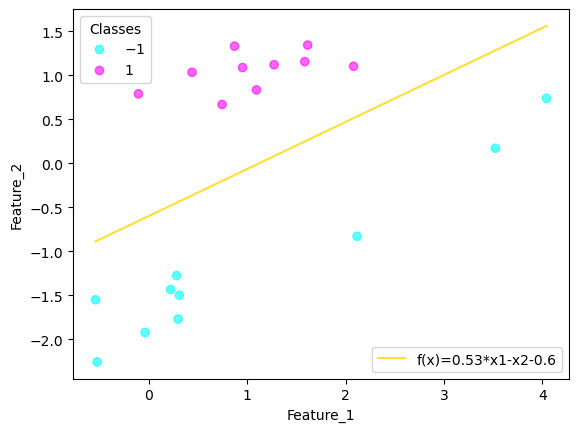

In [110]:
# two-dimention data
td_data = make_classification(n_samples=20, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=24)
td_data = list(td_data)
td_data[1] = np.array([-1 if i == 1 else 1 for i in td_data[1]])
td_data = tuple(td_data)

# visualized data
fig, ax = plt.subplots()
scatter = ax.scatter(td_data[0][:, 0], td_data[0][:, 1], c=td_data[1], alpha=0.6, cmap="cool")
legend_1 = ax.legend(*scatter.legend_elements(), title="Classes", loc="upper left")
ax.add_artist(legend_1)
ax.set_xlabel("Feature_1")
ax.set_ylabel("Feature_2")

# add minimal residual sum of squares line as gold standard
reg = linear_model.LinearRegression()

# reshape for model fitting
reg.fit(td_data[0][:, 0].reshape(-1, 1), td_data[0][:, 1].reshape(-1, 1))
print(f"the intercept is {reg.intercept_[0]} and the coefficient is {reg.coef_[0][0]}")
formula = f"f(x)={round(reg.coef_[0][0], 2)}*x1-x2{round(reg.intercept_[0], 2)}"

# create a x axis for plotting
create_x_axis = np.linspace(min(td_data[0][:, 0]), max(td_data[0][:, 0]), 100).reshape(-1, 1)
predicted_value = reg.predict(create_x_axis)

ax.plot(create_x_axis, predicted_value, c="gold", alpha=0.8, label=formula)
handles, labels = ax.get_legend_handles_labels()
legend_2 = ax.legend(handles, labels, loc="lower right")

plt.show()

## 1.2 manually fit data

The loss function 
$$
\min\mathbf{L}\mathcal{(\omega, b)} = \sum_{x_{i}} \mathcal{y_{i}(\omega\cdot x_{i} + b)}
$$

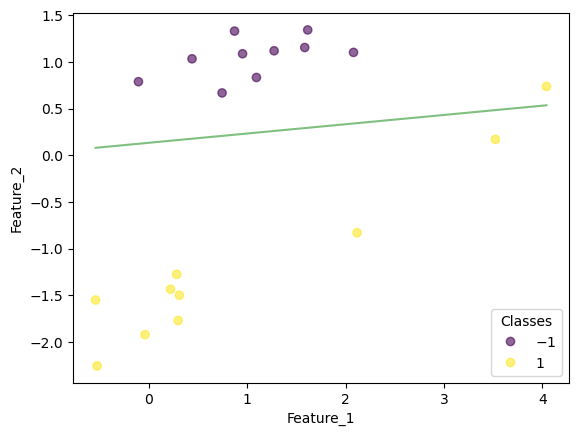

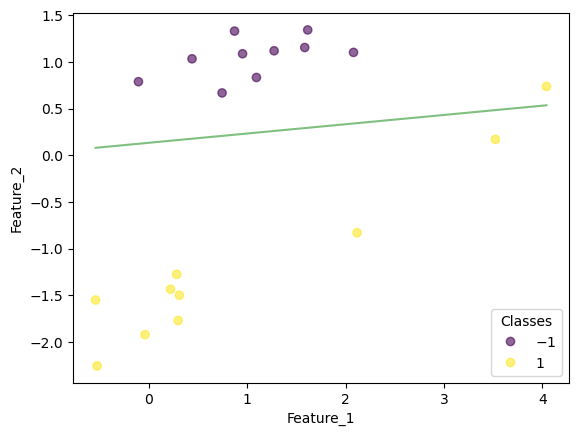

In [46]:
# initiate weight, intercept and learning rate
weight = 0
intercept = 0
learn_rate = 0.2

# take the partial derivative of w and b
def partial_derivative_w(data_point):
    # x*y
    result = data_point[0] * data_point[1]
    return result

def partial_derivative_b(data_point):
    # y
    result = data_point[1]
    return result

# decision function. w and b will be change if exist data point make 
def decision_funtion(weight, intercept):
    decision_index = random.randint(0, 19)
    decision_feature = td_data[0][decision_index]
    decision_label = td_data[1][decision_index]
    result = (weight * decision_feature[0] * decision_feature[1] + intercept) * decision_label
    return result

def plot_function(weight, intercept):
    fig, ax = plt.subplots()
    scatter = ax.scatter(td_data[0][:, 0], td_data[0][:, 1], c=td_data[1], alpha=0.6)
    ax.legend(*scatter.legend_elements(), title="Classes")
    ax.set_xlabel("Feature_1")
    ax.set_ylabel("Feature_2")
    hyperplane = [weight * i + intercept for i in create_x_axis]
    ax.plot(create_x_axis, hyperplane, c='green', alpha=0.5)
    plt.show()

# iteration times
iteration_times = 10
# it is not correctly classified for any data point resulting in loss function equte 0.
for iteration in range(iteration_times):
    # random value in two dimention data
    random_value = td_data[0][random.randint(0, 19)]
    new_weight = weight + (learn_rate * partial_derivative_w(random_value))
    new_intercept = intercept + (learn_rate * partial_derivative_b(random_value))
    
    if decision_funtion(new_weight, new_intercept) < 0:
        weight = new_weight
        intercept = new_intercept
        plot_function(weight, intercept)
    else:
        plot_function(weight, intercept)
        break
    # print(f"The {iteration + 1} iteration\tweight={weight}\tintercept={intercept}\n")

In [4]:
random.randint(1,20)

17

In [34]:
# td_data[0] 


SyntaxError: invalid syntax (1113127038.py, line 2)

In [36]:
td_data[0][np.where(td_data[1] == -1)]

array([[ 2.08063026,  1.10142925],
       [ 0.43824645,  1.0328796 ],
       [ 0.95225157,  1.08703408],
       [ 0.87058463,  1.32976757],
       [ 1.61459141,  1.34226064],
       [ 1.27300307,  1.11890281],
       [-0.10655418,  0.78788851],
       [ 0.74401817,  0.66753246],
       [ 1.0932893 ,  0.8328887 ],
       [ 1.5844112 ,  1.15387638]])